# IBM Attrition Data Analysis 


All the imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix,roc_auc_score,plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,accuracy_score
from pycm import ConfusionMatrix
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, auc
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.naive_bayes import GaussianNB

Importing Dataset as pandas dataframe

In [2]:
df = pd.read_csv(r"C:\Users\amank\DMML CW\IBM.csv")
df.dataframeName = 'IBM.csv'
nRow, nCol = df.shape
print(f'{nRow} rows and {nCol} columns')

1470 rows and 35 columns


## Exploring the Dataset

In [3]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Checking for incomplete entries and datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

There are no null or incomplete values

# Data Exploration 

In [6]:
categorical_data = df.select_dtypes('object')
categorical_data.keys()

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

Therefore there are 9 features with non numeric values

Their values

In [7]:
for i in categorical_data.keys():
    print(i," : ",df[i].unique(),"\n")

Attrition  :  ['Yes' 'No'] 

BusinessTravel  :  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Department  :  ['Sales' 'Research & Development' 'Human Resources'] 

EducationField  :  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender  :  ['Female' 'Male'] 

JobRole  :  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] 

MaritalStatus  :  ['Single' 'Married' 'Divorced'] 

Over18  :  ['Y'] 

OverTime  :  ['Yes' 'No'] 



In [8]:
df.columns[df.nunique() <= 1]

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')

since the above features only have a single value, it is better to drop them

In [9]:
df.drop('EmployeeCount',axis =1,inplace=True)
df.drop('StandardHours',axis =1,inplace=True)
df.drop('Over18',axis =1,inplace=True)
df.drop('PerformanceRating',axis =1,inplace=True)


We can also see EmployeeNumber which would also not help in any form of predicition so that can be dropped as well 

In [10]:
df.drop('EmployeeNumber',axis =1,inplace=True)

# Lets us explore the data with some visualization 

[]

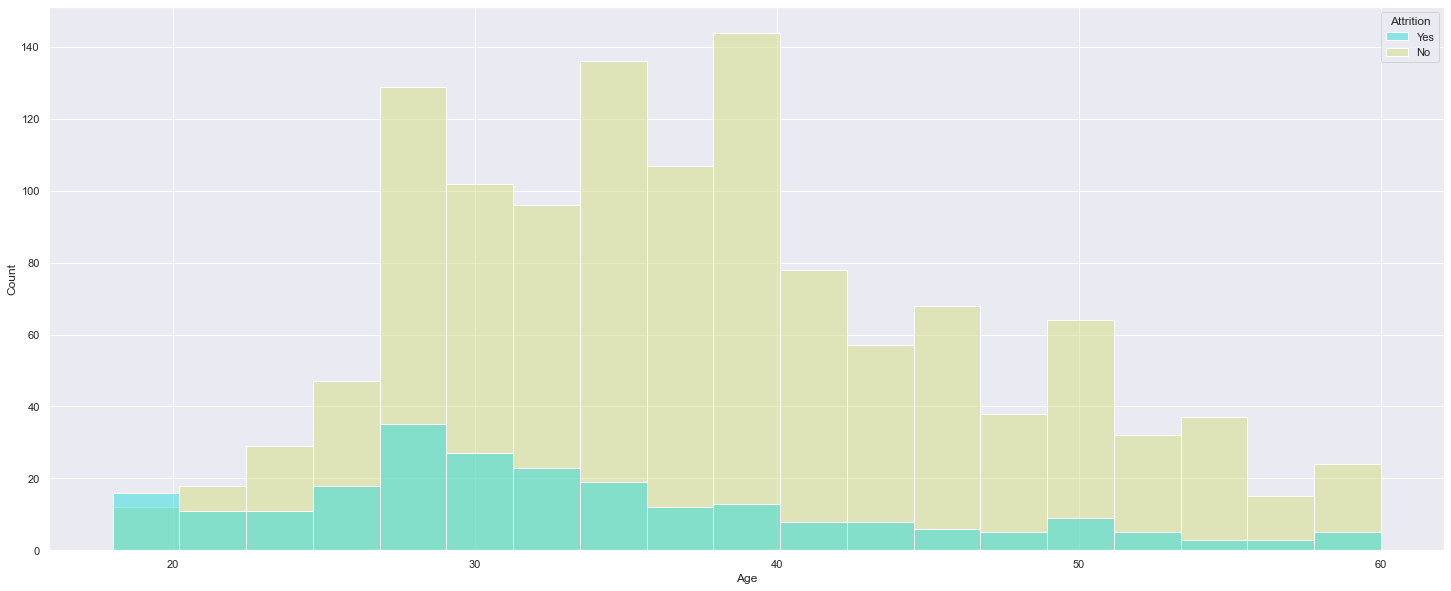

In [11]:
sns.set(rc = {'figure.figsize':(25,10)})
sns.histplot(data = df,
            x = "Age",
            hue = "Attrition",
            palette = "rainbow").set()

Here is a age 

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

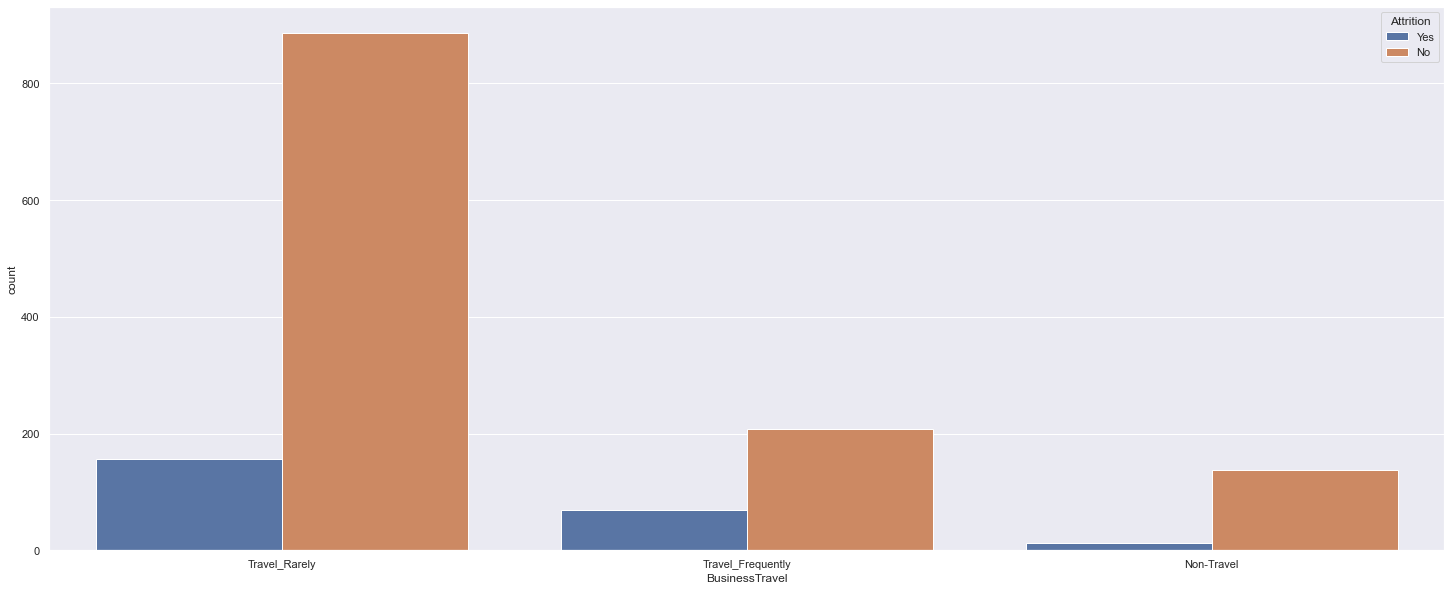

In [12]:
sns.countplot(x='BusinessTravel', data=df, hue="Attrition")



[]

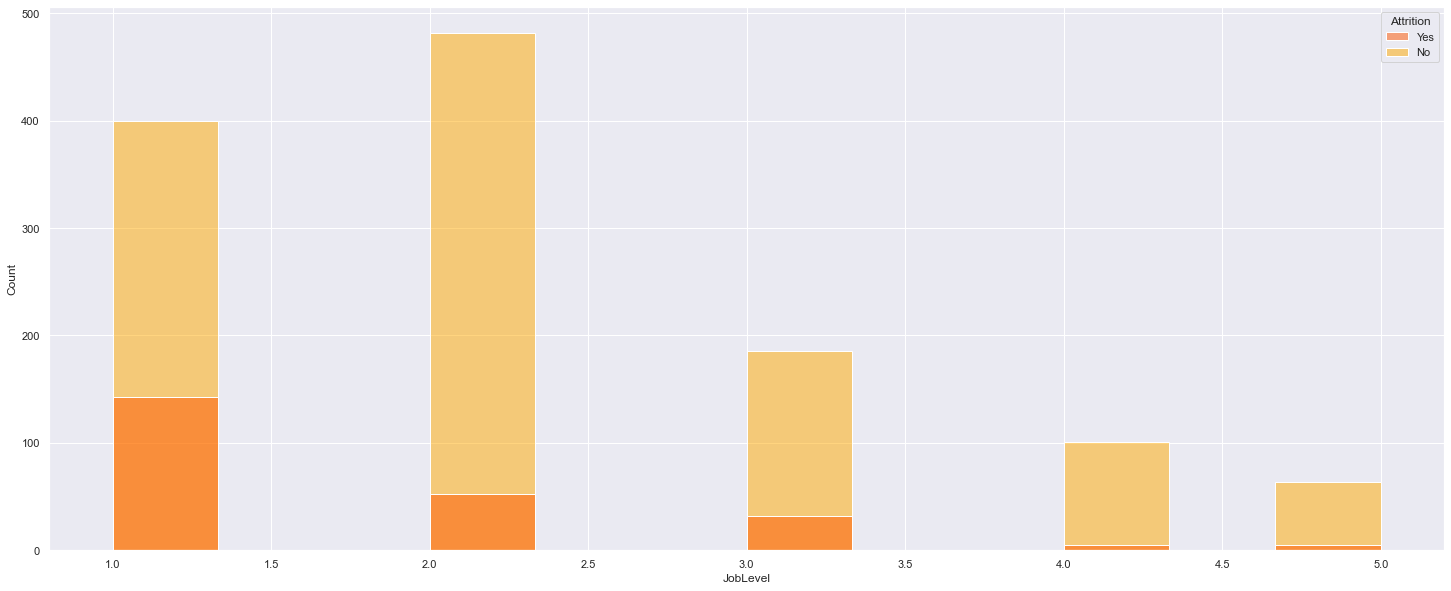

In [13]:
sns.histplot(data = df,
            x = "JobLevel",
            hue = "Attrition",
            palette = "autumn").set()


[]

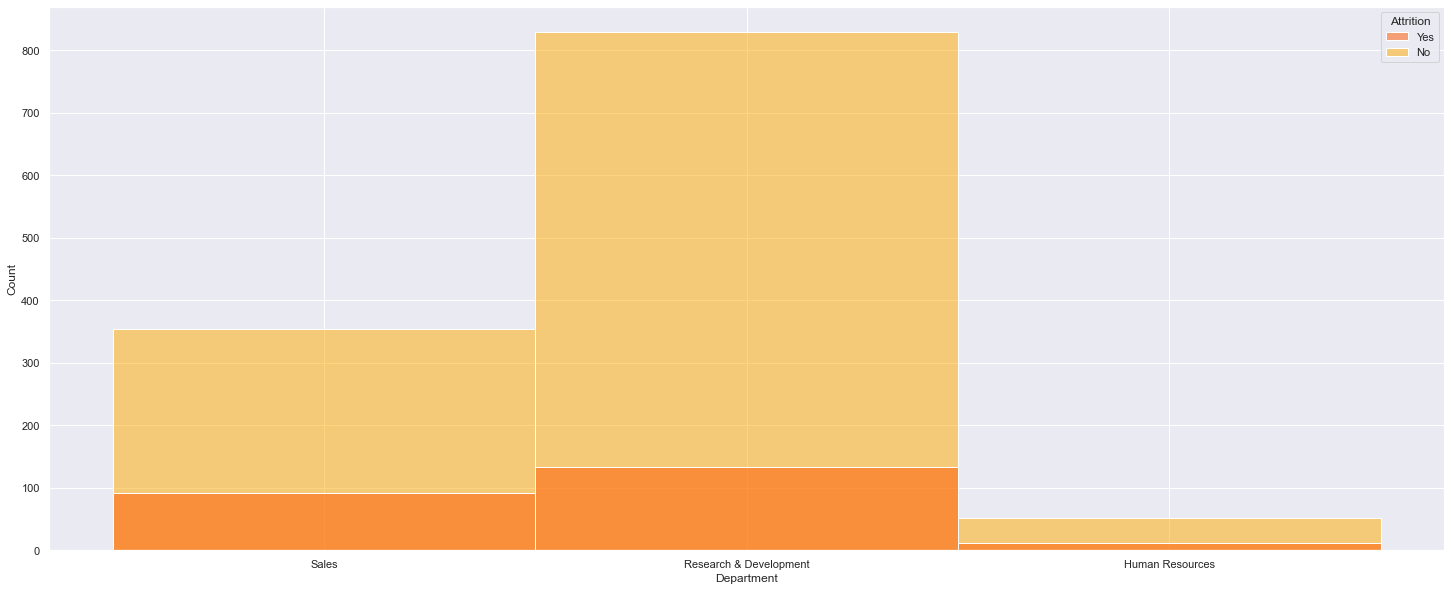

In [14]:
sns.histplot(data = df,
            x = "Department",
            hue = "Attrition",
            palette = "autumn").set()

[]

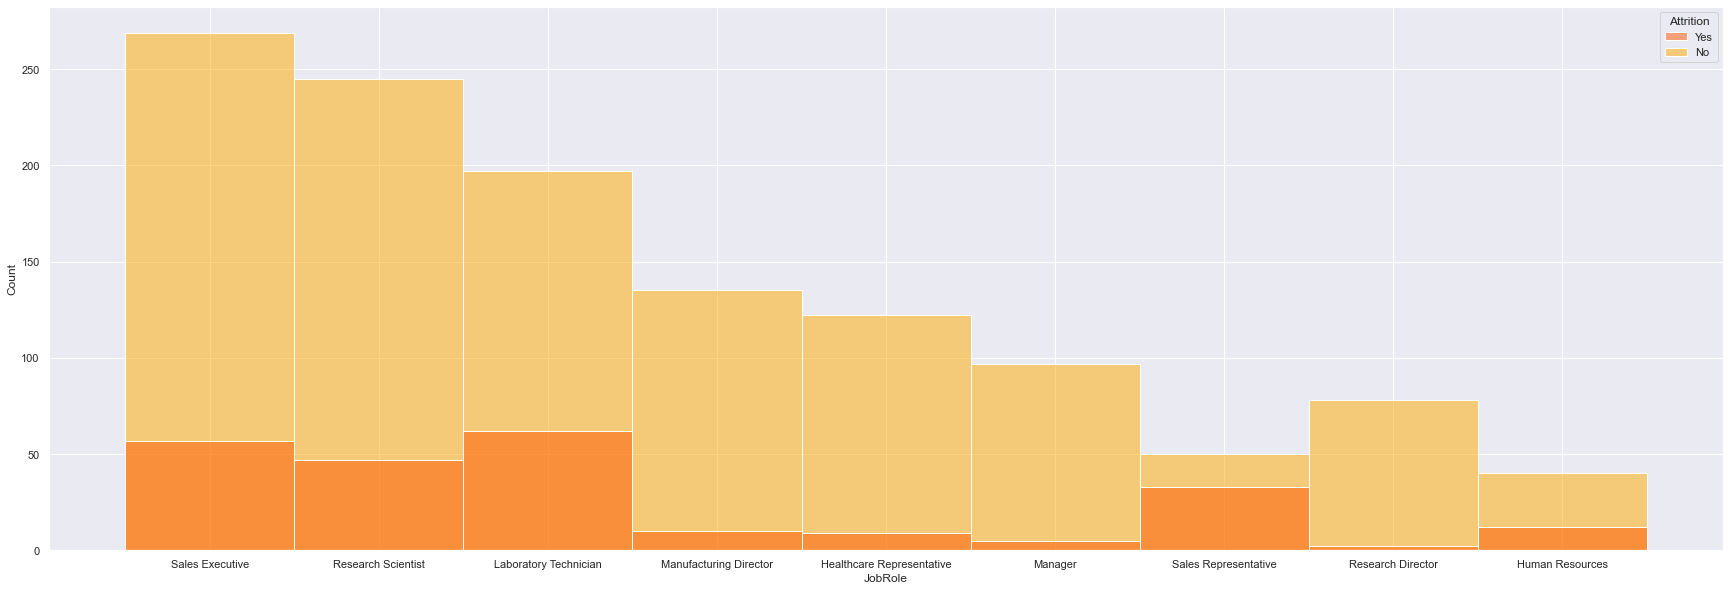

In [15]:
sns.set(rc = {'figure.figsize':(30,10)})
sns.histplot(data = df,
            x = "JobRole",
            hue = "Attrition",
            palette = "autumn").set()

[]

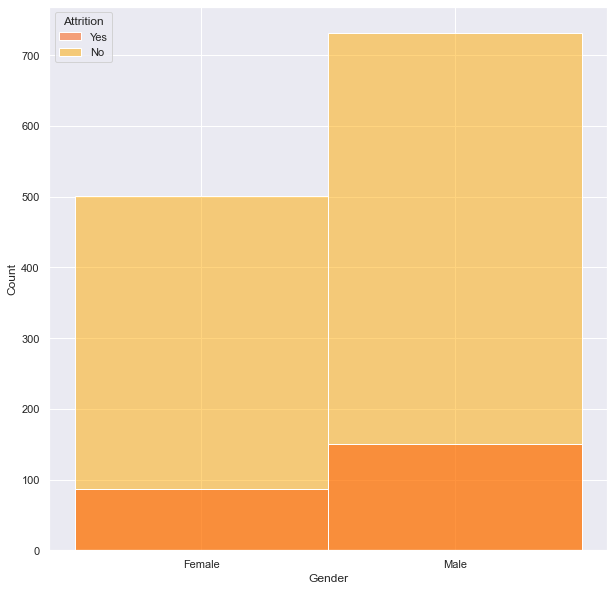

In [16]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.histplot(data = df,
            x = "Gender",
            hue = "Attrition",
            palette = "autumn").set()

[]

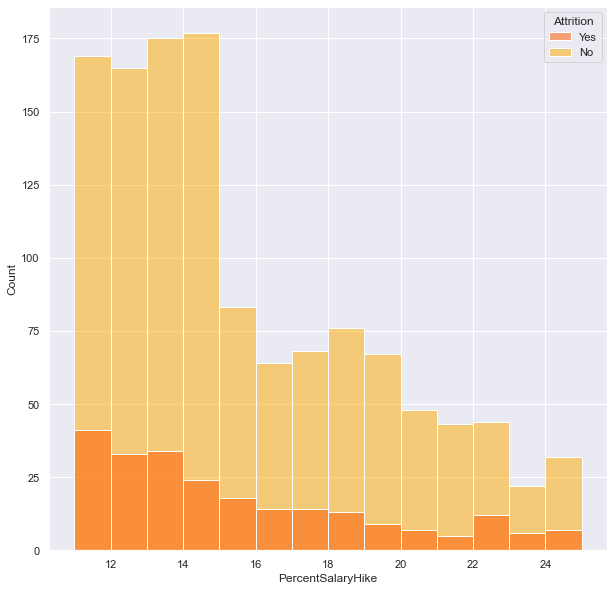

In [17]:
sns.histplot(data = df,
            x = "PercentSalaryHike",
            hue = "Attrition",
            palette = "autumn").set()

[]

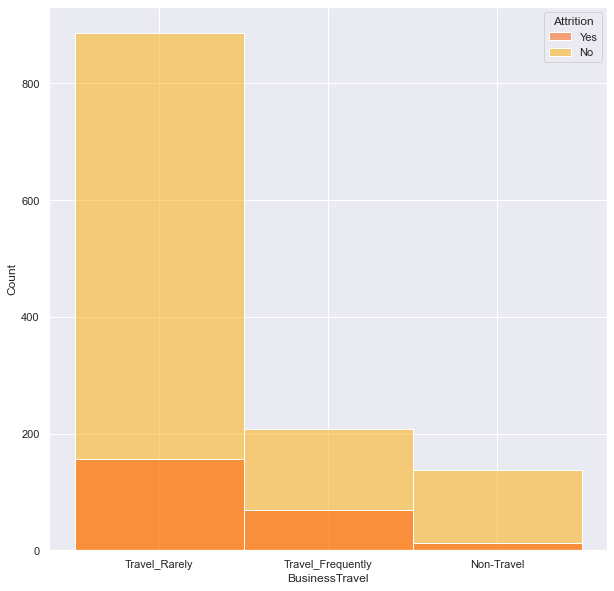

In [18]:

sns.histplot(data = df,
            x = "BusinessTravel",
            hue = "Attrition",
            palette = "autumn").set()

[]

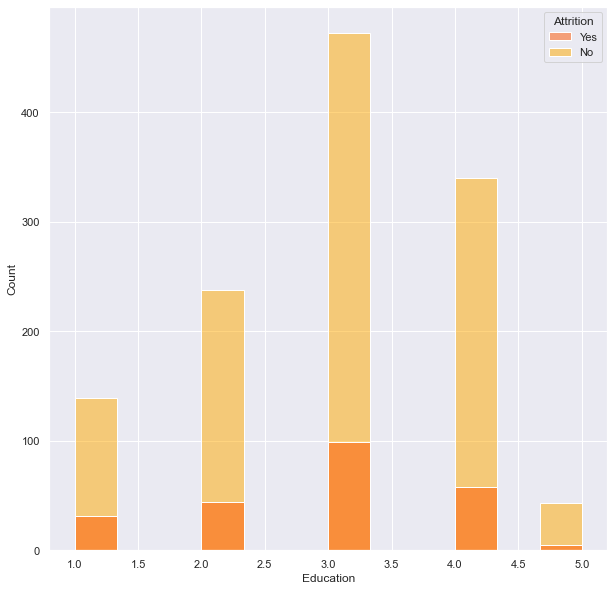

In [19]:
sns.histplot(data = df,
            x = "Education",
            hue = "Attrition",
            palette = "autumn").set()

[]

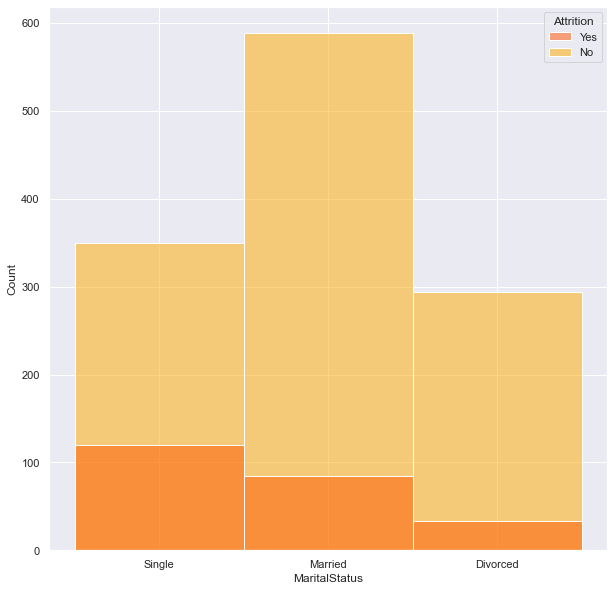

In [20]:
sns.histplot(data = df,
            x = "MaritalStatus",
            hue = "Attrition",
            palette = "autumn").set()

## Key Observations

1) More males have left the company than females
2) Employees who travel rarely have stayed in the company
3) More employees of Research & Development department have stayed in the company 
4) Married employees stay more often than single
5) More employees who work more overtime leave the company comapred to people who dont.
6) Employees with low Monthly income and low Job Level leave the company than those with high. 

# Data Preprocessing

## Checking for Skewness 

In [21]:
df.skew()

C:\Users\amank\AppData\Local\Temp/ipykernel_8188/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

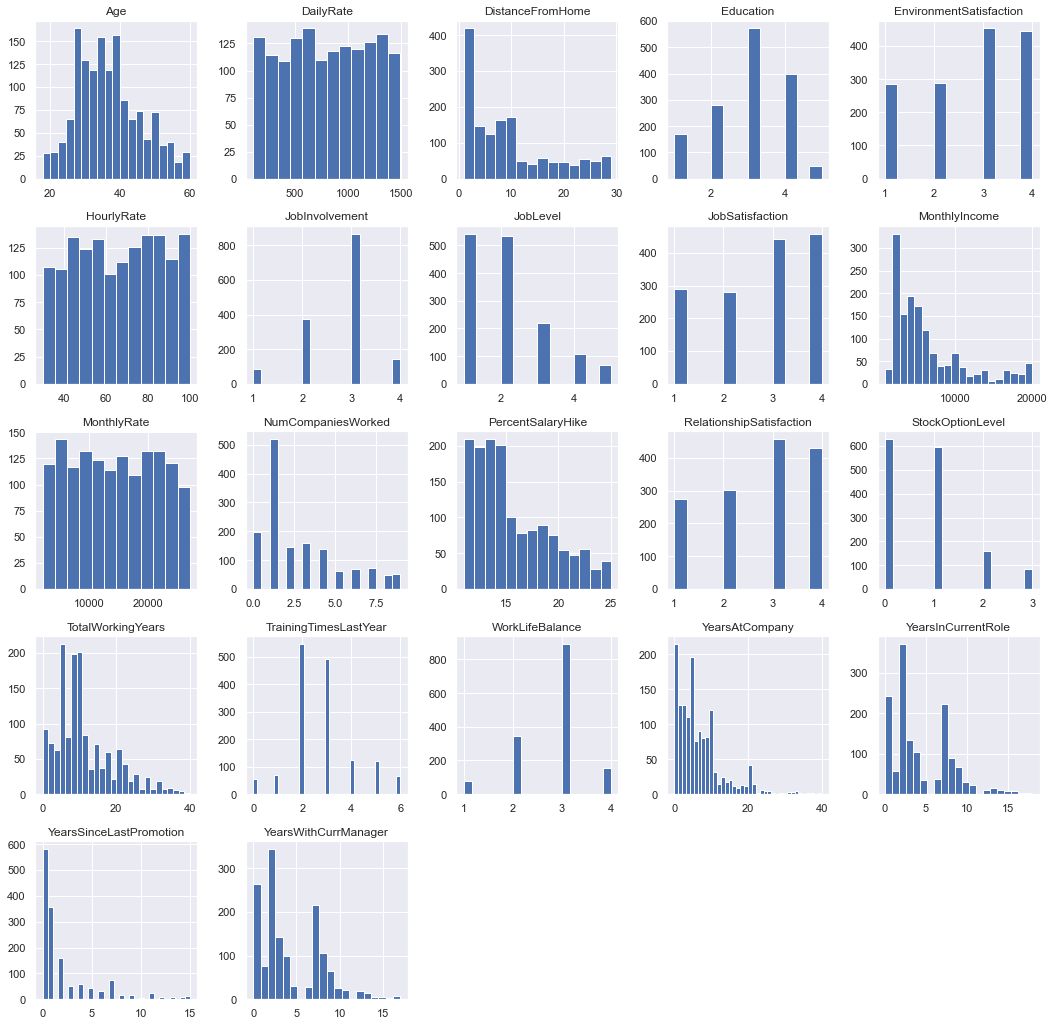

In [22]:
df.hist(figsize=(18,18),grid=True,bins='auto');

We use log function to take care of the skewness for columns with greater than 0.5 skew score

C:\Users\amank\AppData\Local\Temp/ipykernel_8188/4191402575.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  for index in df.skew().index:
C:\Users\amank\AppData\Local\Temp/ipykernel_8188/4191402575.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if (df.skew().loc[index]>0.5 or df.skew().loc[index]<-0.5):


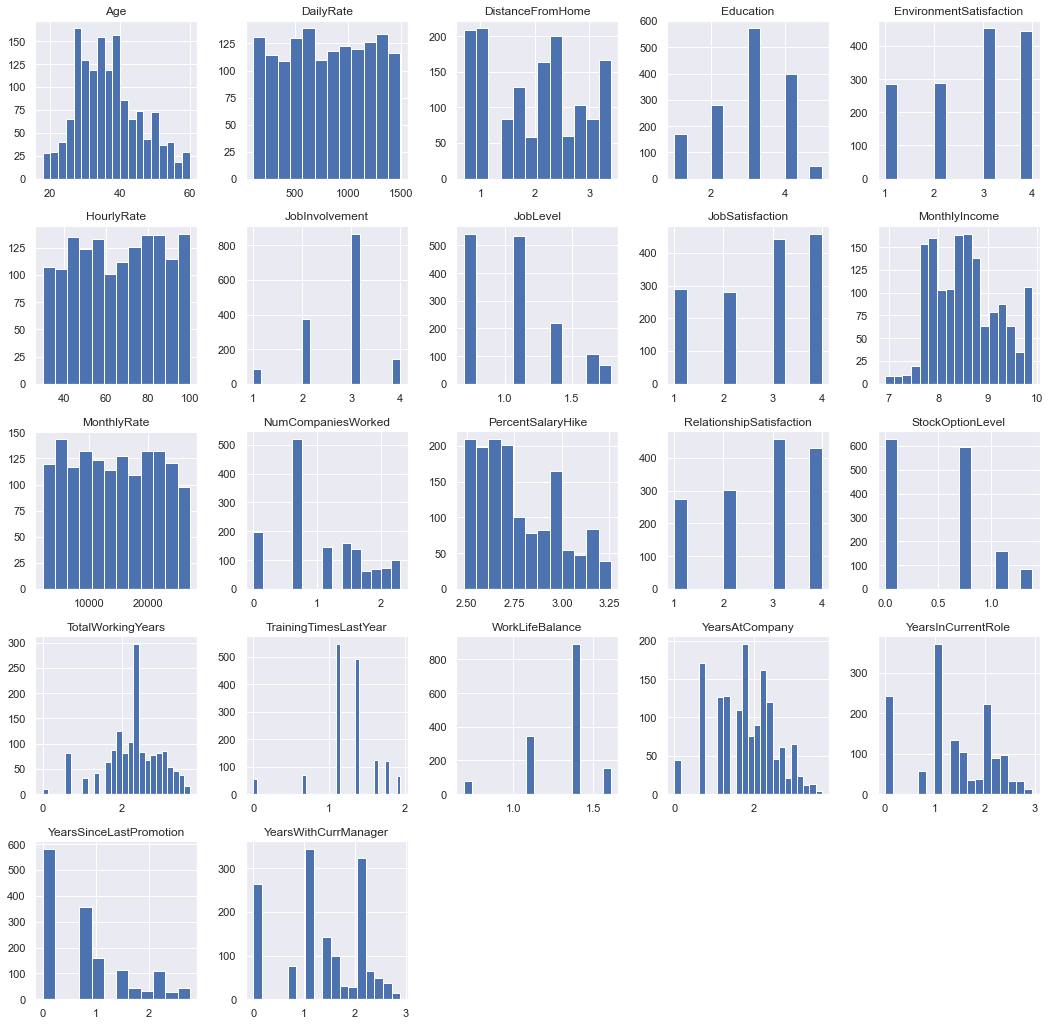

In [23]:
for index in df.skew().index:
    if (df.skew().loc[index]>0.5 or df.skew().loc[index]<-0.5):
        df[index]=np.log1p(df[index])

df.hist(figsize=(18,18),grid=True,bins='auto');        

# Removing Outliers 

## Reference : https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

A function to find outlier 

C:\Users\amank\AppData\Local\Temp/ipykernel_8188/1300572045.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


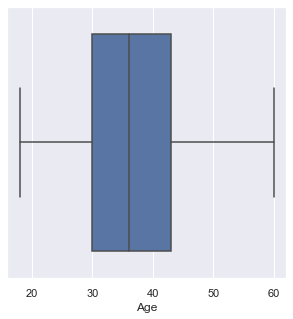

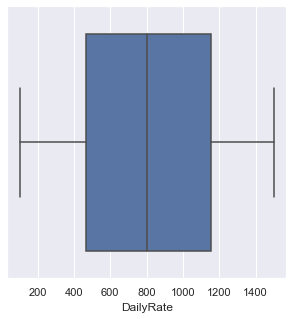

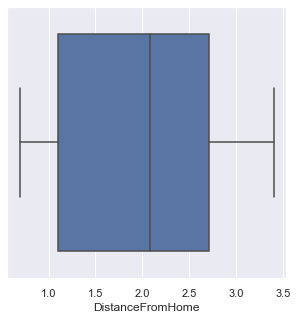

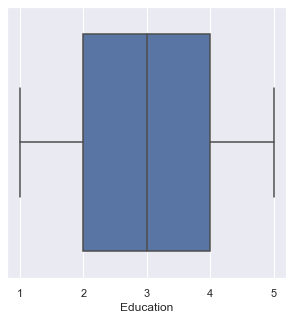

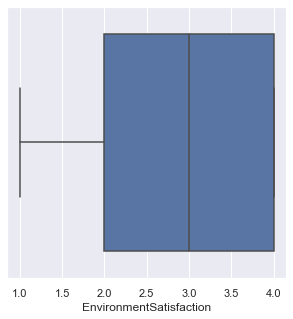

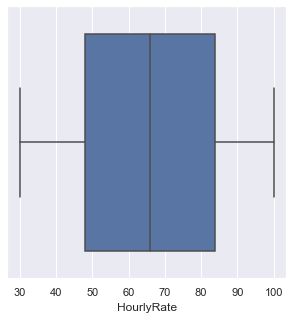

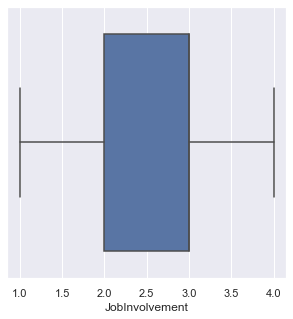

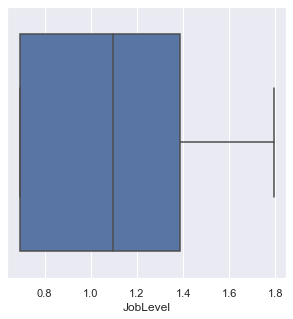

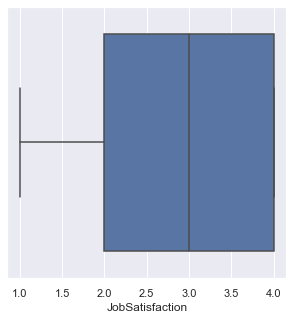

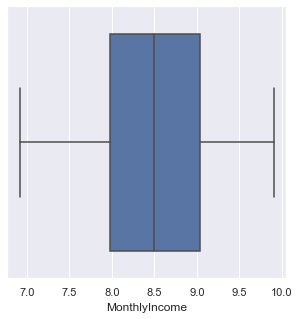

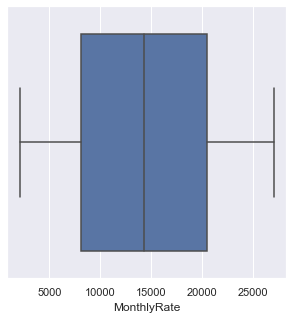

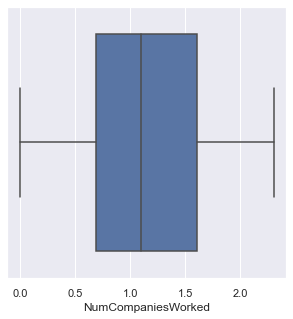

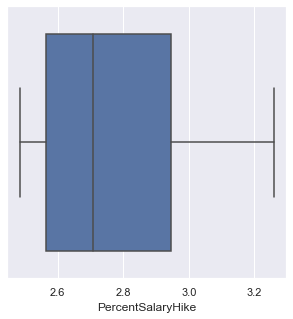

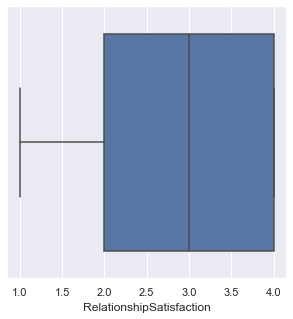

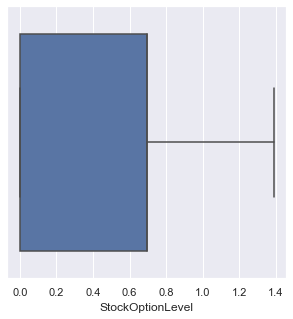

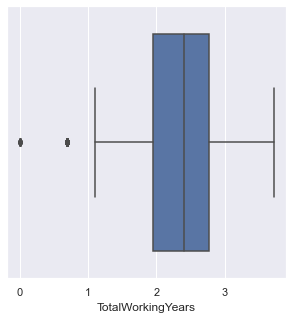

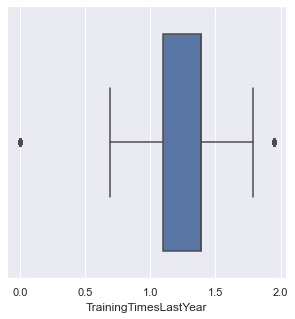

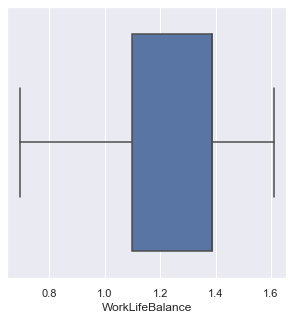

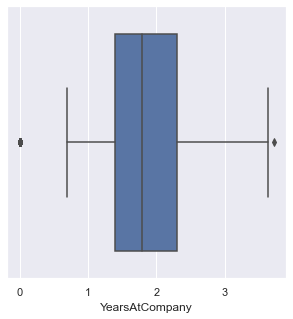

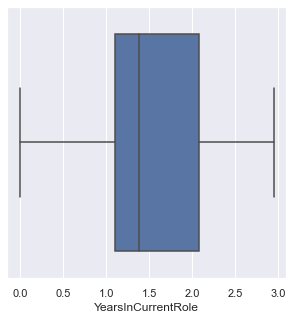

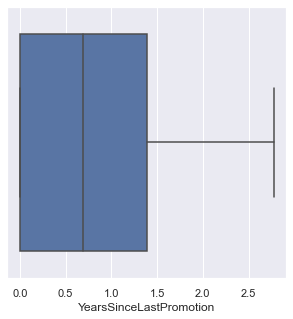

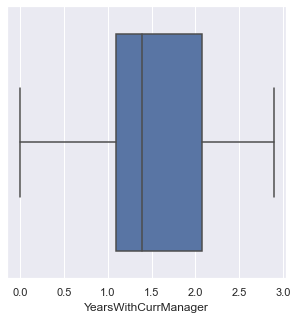

In [24]:
df1=df.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(5,5))
        sns.boxplot(data=df1, x=column)

C:\Users\amank\AppData\Local\Temp/ipykernel_8188/1156237522.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


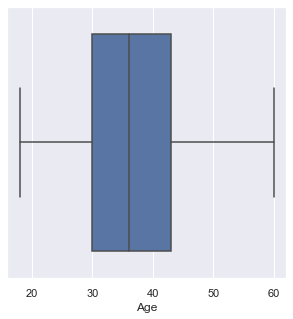

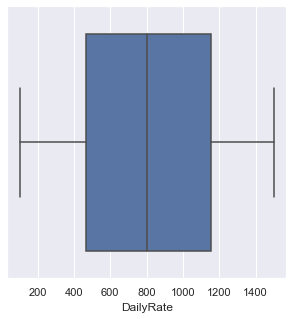

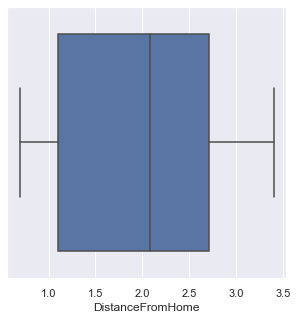

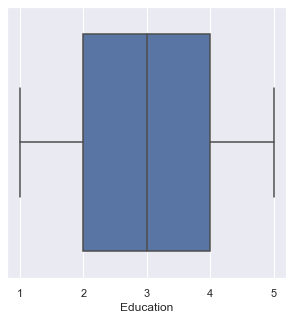

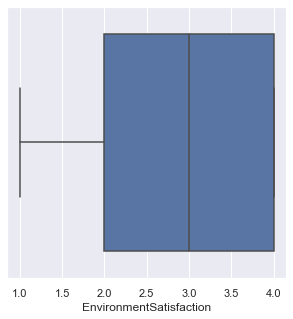

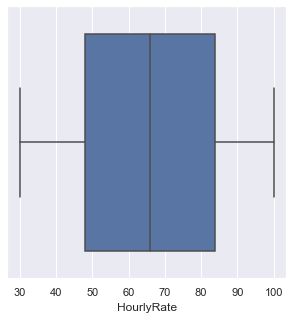

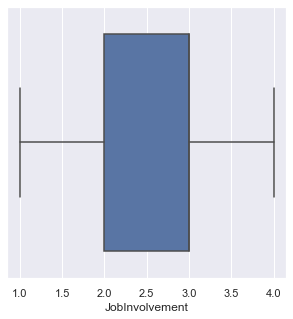

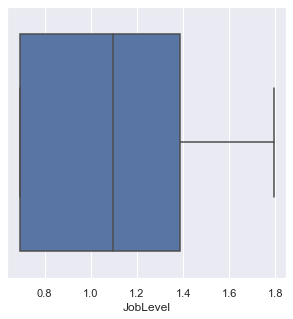

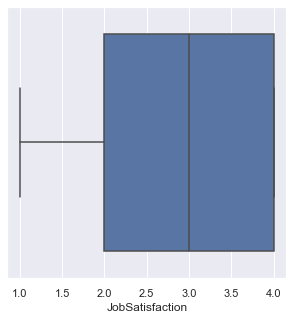

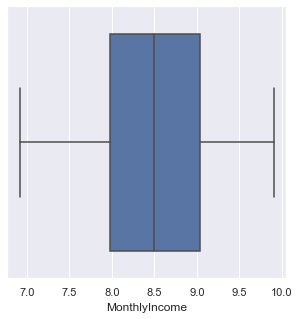

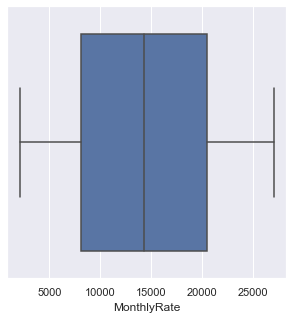

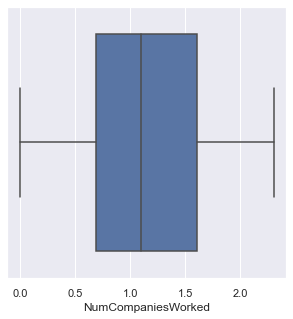

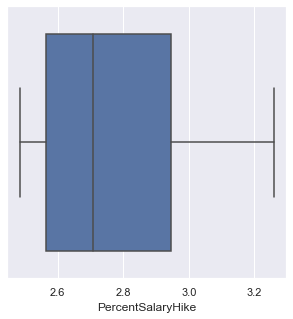

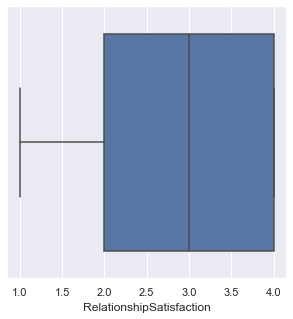

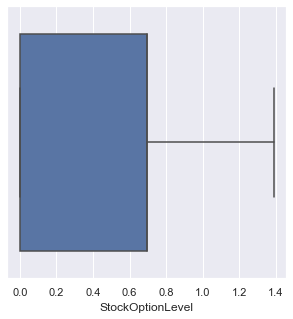

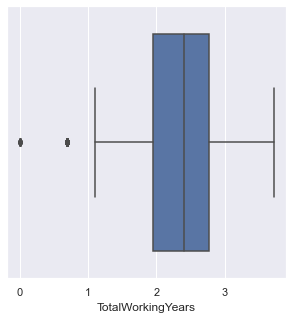

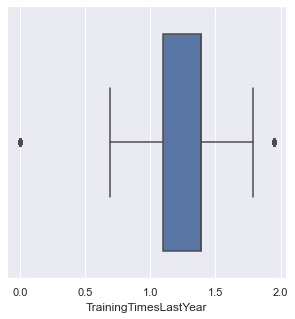

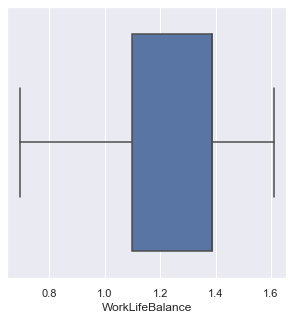

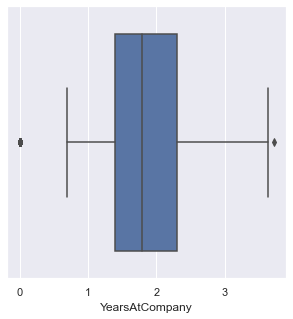

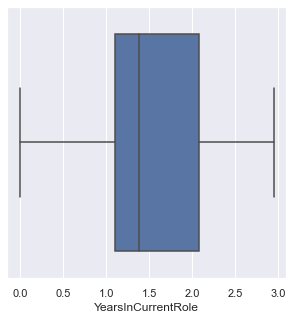

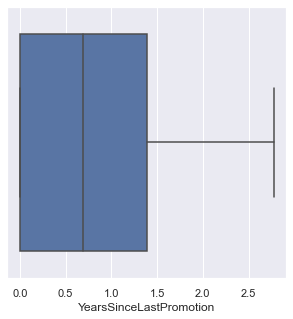

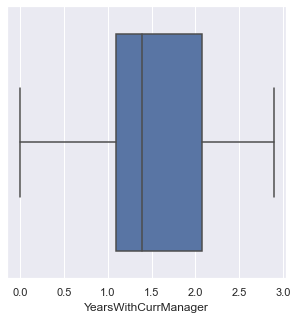

In [25]:
num_train = df.select_dtypes(include=["number"])
cat_train = df.select_dtypes(exclude=["number"])
idx = np.all(stats.zscore(num_train) < 3, axis=1)
df_clean = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)

# Q1 = num_train.quantile(0.25)
# Q3 = num_train.quantile(0.80)
# IQR = Q3 - Q1
# idx = ~((num_train < (Q1 - 1.5 * IQR)) | (num_train > (Q3 + 1.5 * IQR))).any(axis=1)
# df = pd.concat([num_train.loc[idx], cat_train.loc[idx]], axis=1)

df1=df_clean.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(5,5))
        sns.boxplot(data=df1, x=column)

In [26]:

df.replace({'Yes':1,'No':0,'Travel_Rarely' : 1, 'Travel_Frequently' : 2, 'Non-Travel' : 3,
'Sales' : 1, 'Research & Development' : 2, 'Human Resources' : 3}, inplace=True)
X = df.drop(['Attrition'],axis=1)





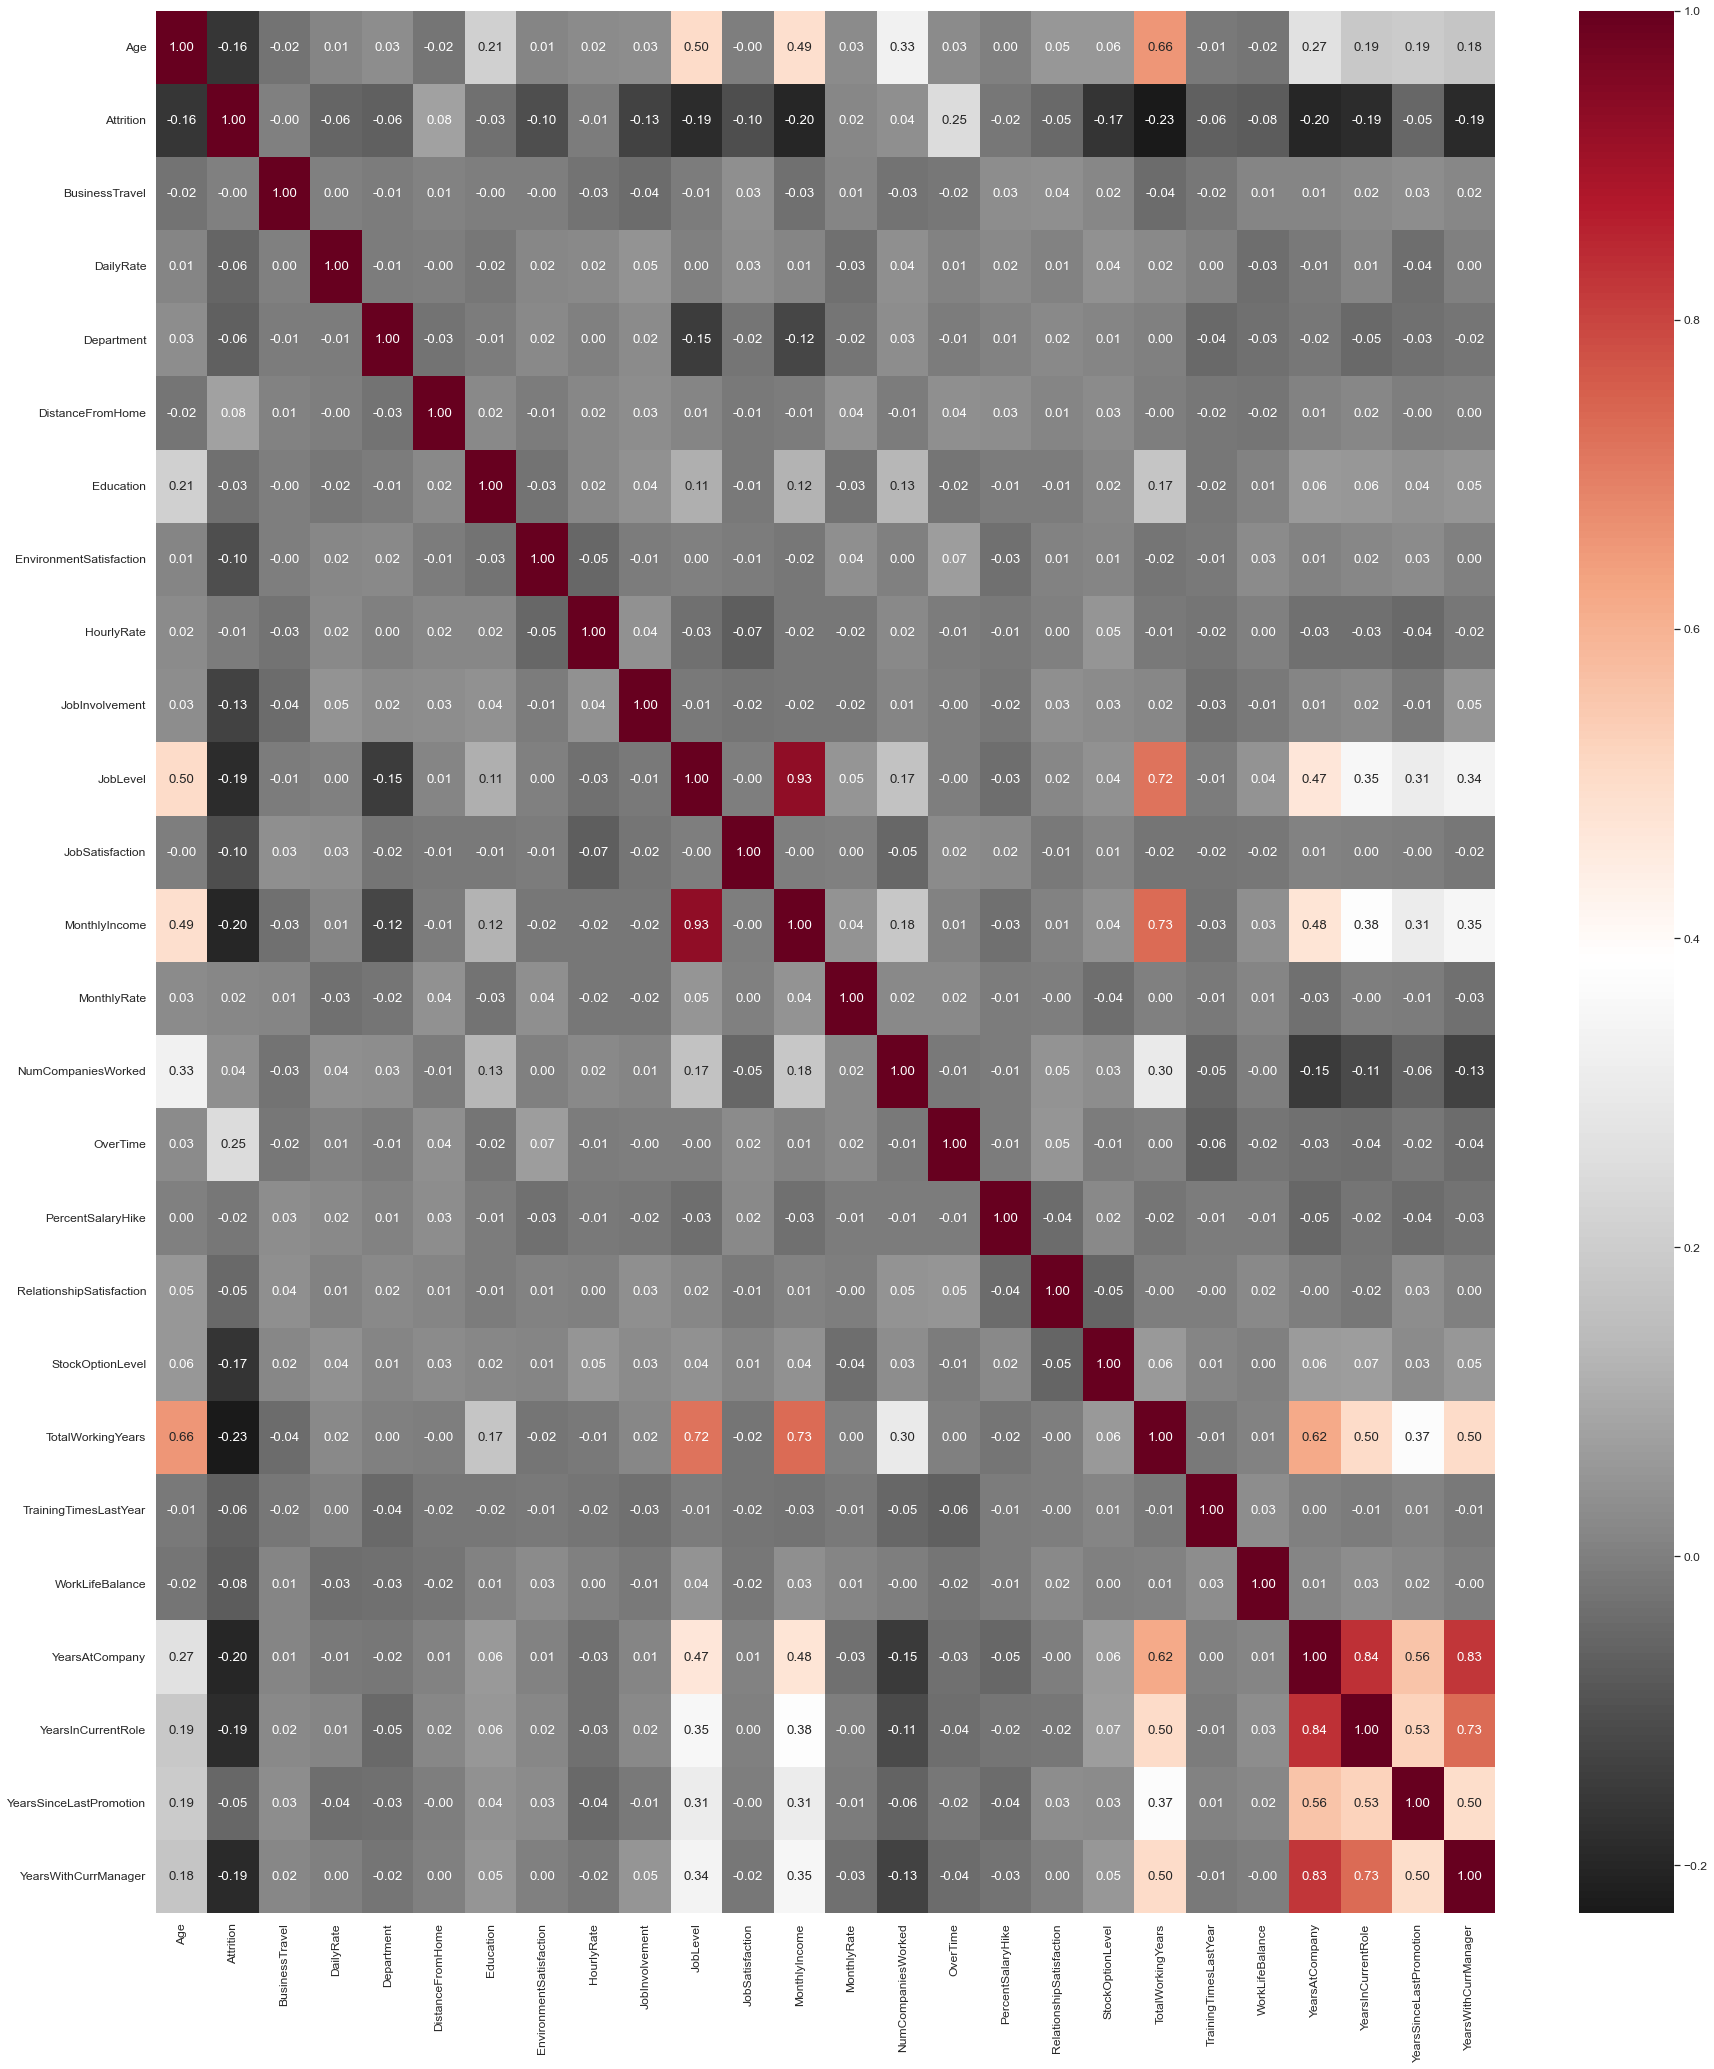

In [27]:
corr_matrix = df.corr()

plt.figure(figsize=(30,35))
sns.set(font_scale = 1.1)
sns.heatmap(corr_matrix, cmap='RdGy_r', annot=True, fmt='.2f')
plt.show()


Checking the correlation between attrition and other features 

## Splitting the data for classifying

In [28]:
Y = df['Attrition']
# encoder.fit(X) 
X = pd.get_dummies(X)
# X = pd.get_dummies(X)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, shuffle= True)


Gaussian Naive Bayes

reference : https://www.analyticsvidhya.com/blog/2021/01/a-guide-to-the-naive-bayes-algorithm/

In [29]:
GaussianNB_classifier = GaussianNB()
y_pred = GaussianNB_classifier.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
           % (X_test.shape[0], (y_test != y_pred).sum()))



Number of mislabeled points out of a total 294 points : 64


In [30]:


cm = ConfusionMatrix(actual_vector=np.array(y_test), predict_vector=np.array(y_pred))

TPR = cm.class_stat.get("TPR")
FPR = cm.class_stat.get("FPR")
TNR = cm.class_stat.get("TNR")
FNR  = cm.class_stat.get("FNR")
ACC = cm.class_stat.get("ACC")
F1 = cm.class_stat.get("F1")
AUC= cm.class_stat.get("AUC")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_area = roc_auc_score(y_test, GaussianNB_classifier.predict_proba(X_test)[:,1])

In [31]:
print("Accuracy : ", ACC)
print("Precision : ", precision)
print("Recall : ", recall)
print("True Positive Rate : ", TPR)
print("False Positive Rate : ", FPR)
print("True Negative Rate : ", TNR)
print("False Negative Rate : ", FNR)


print("F1 Score : ", F1)
print("ROC Area : ", AUC)


Accuracy :  {0: 0.782312925170068, 1: 0.782312925170068}
Precision :  0.410958904109589
Recall :  0.5882352941176471
True Positive Rate :  {0: 0.823045267489712, 1: 0.5882352941176471}
False Positive Rate :  {0: 0.4117647058823529, 1: 0.17695473251028804}
True Negative Rate :  {0: 0.5882352941176471, 1: 0.823045267489712}
False Negative Rate :  {0: 0.17695473251028804, 1: 0.4117647058823529}
F1 Score :  {0: 0.8620689655172413, 1: 0.4838709677419355}
ROC Area :  {0: 0.7056402808036795, 1: 0.7056402808036795}


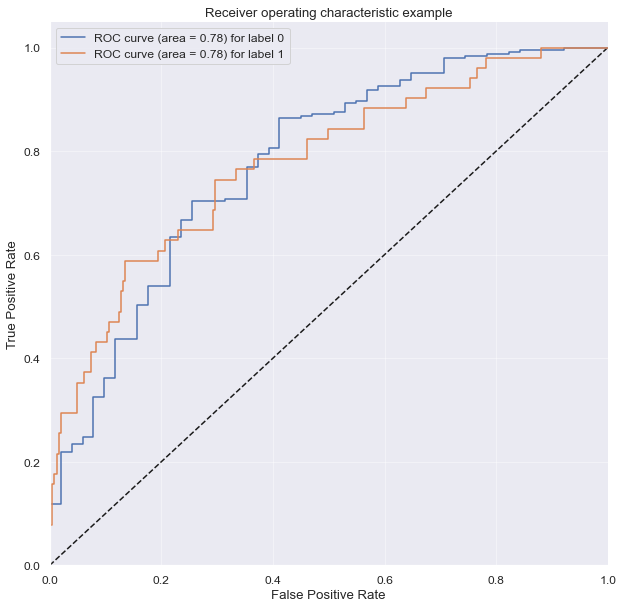

In [32]:
probs = GaussianNB_classifier.predict_proba(X_test)
preds = probs[:,1]
fpr = dict()
tpr = dict()
roc_auc = dict()

# calculate dummies once
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# roc for each class
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')
for i in range(2):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
ax.legend(loc="best")
ax.grid(alpha=.4)
sns.despine()
plt.show()



# Feature selection 

### Scoring argument specifies the evaluation criterion to be used. For regression problems, r2 score is the default and only implementation. But for classification, there are options for accuracy, precision, recall, f1-score, etc.

In [33]:
def get_features(results):
    max_score = max(results.avg_score)
    count = 0
    max_index = 0
    result = []
    for i in results.avg_score:
        count+=1
        if (i == max_score) :
            max_index = count
            result.append(results.feature_names[max_index])
            result.append(results.avg_score[max_index])
            break

    return result
    

Forward selection — starts with one predictor and adds more iteratively. At each subsequent iteration, the best of the remaining original predictors are added based on performance criteria.
Backward elimination — starts with all predictors and eliminates one-by-one iteratively. One of the most popular algorithms is Recursive Feature Elimination (RFE) which eliminates less important predictors based on feature importance ranking.
Step-wise selection — bi-directional, based on a combination of forward selection and backward elimination. It is considered less greedy than the previous two procedures since it does reconsider adding predictors back into the model that has been removed (and vice versa). Nonetheless, the considerations are still made based on local optimisation at any given iteration.

Reference : https://towardsdatascience.com/feature-selection-for-machine-learning-in-python-wrapper-methods-2b5e27d2db31

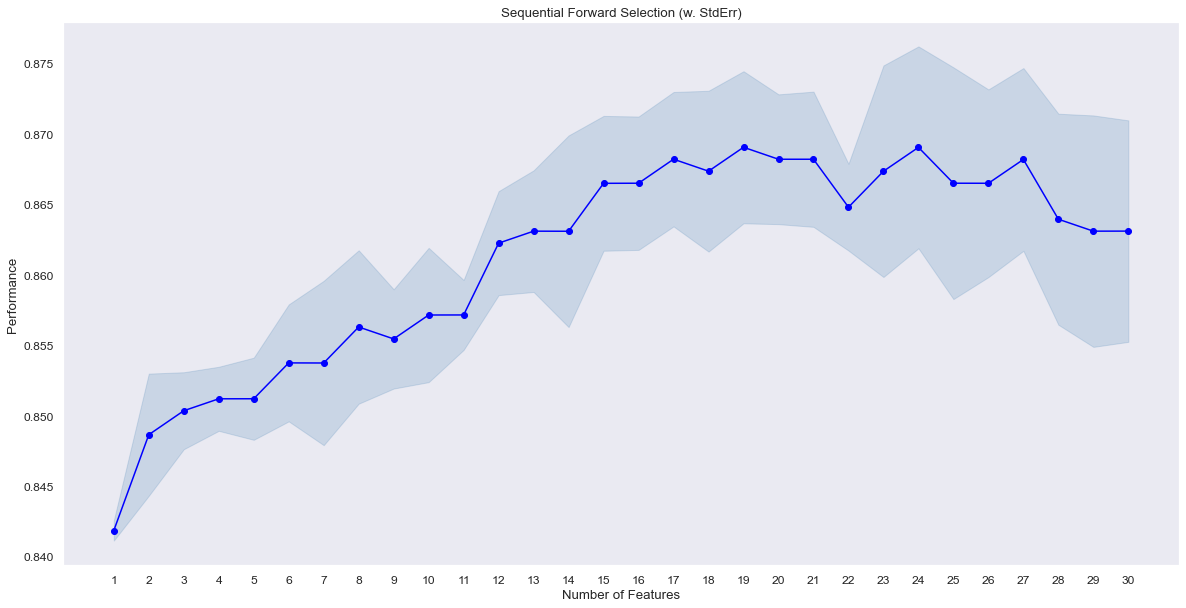

In [34]:
GaussianNB_classifier  = GaussianNB()


sfs = SFS(GaussianNB(),
           k_features=30,
           forward=True,
           floating=False,
           scoring = 'accuracy',
           cv = 5,
           n_jobs=-1
           )

sfs.fit(X_train, y_train)


df_SFS_results_forward_selection = pd.DataFrame(sfs.subsets_).transpose()

Highest_SFS_results_forward_selection = get_features(df_SFS_results_forward_selection)


fig = plot_sfs(sfs.get_metric_dict(), kind='std_err',figsize=(20,10))
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()



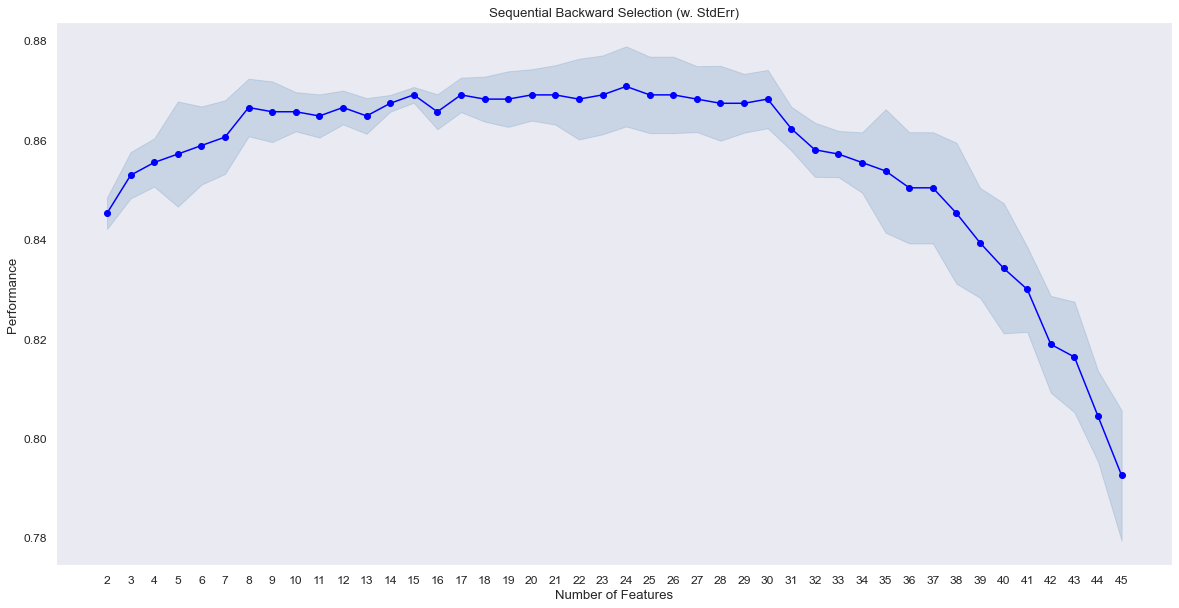

In [36]:
sfs = SFS(GaussianNB(),
           k_features=2, #here 2 is the minimum number of features it will start with 
           forward=False,
           floating=False,
           scoring = 'accuracy',
           cv = 5,
           n_jobs=-1)
#Use SFS to select the top 5 features 
sfs.fit(X_train, y_train)

#Create a dataframe for the SFS results 
df_SFS_results_backward_selection = pd.DataFrame(sfs.subsets_).transpose()
Highest_SFS_results_backward_selection = get_features(df_SFS_results_backward_selection)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',figsize=(20,10))
plt.title('Sequential Backward Selection (w. StdErr)')
plt.grid()
plt.show()

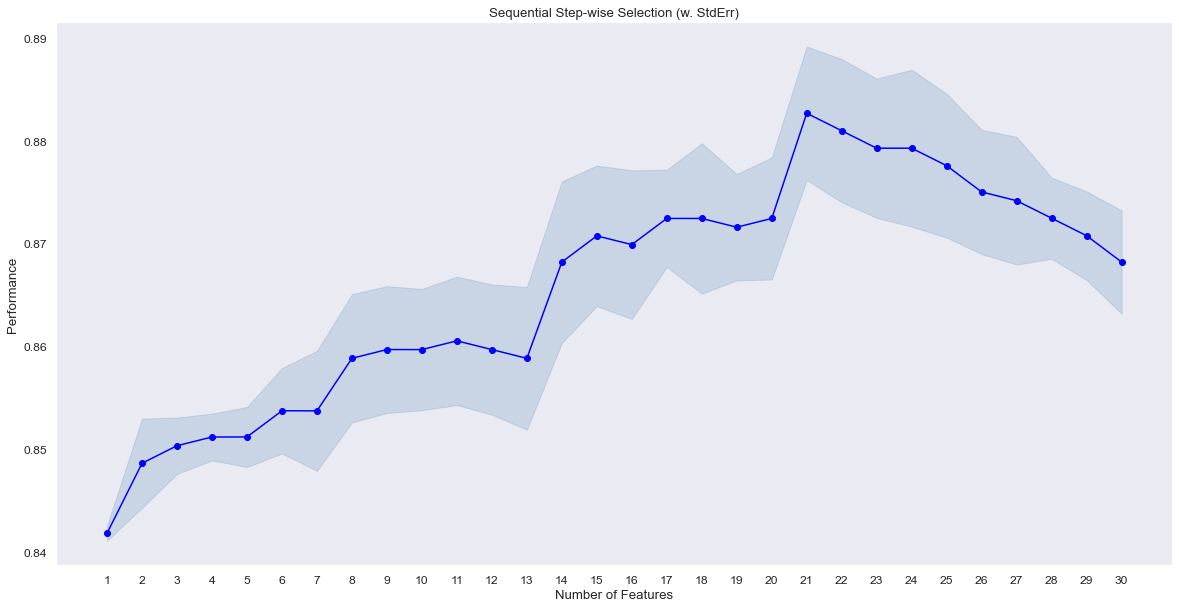

In [37]:
sfs = SFS(GaussianNB(),
           k_features=30,
           forward=True,
           floating=True,
           scoring = 'accuracy',
           cv = 5,
           n_jobs=-1)
 
sfs.fit(X_train, y_train)

#Create a dataframe for the SFS results 
df_SFS_results_BiDirectional_selection = pd.DataFrame(sfs.subsets_).transpose()
Highest_SFS_results_BiDirectional_selection = get_features(df_SFS_results_BiDirectional_selection)

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err',figsize=(20,10))

plt.title('Sequential Step-wise Selection (w. StdErr)')
plt.grid()
plt.show()

In [44]:
print("Highest Accuracy obtained from forward selection : ", Highest_SFS_results_forward_selection[1])
print("List of best features obtained from forwards selection : ", Highest_SFS_results_forward_selection[0])
print("==============================================================================================================================================\n\n")

print("Highest Accuracy obtained from backward selection : ", Highest_SFS_results_backward_selection[1])
print("List of best features obtained from backward selection : ", Highest_SFS_results_backward_selection[0])
print("==============================================================================================================================================\n\n")

print("Highest Accuracy obtained from Bi-Directional selection : ", Highest_SFS_results_BiDirectional_selection[1])
print("List of best features obtained from Bi-Directional selection : ", Highest_SFS_results_BiDirectional_selection[0])
print("==============================================================================================================================================\n\n")

Highest Accuracy obtained from forward selection :  0.8690551749008295
List of best features obtained from forwards selection :  ('Age', 'BusinessTravel', 'DailyRate', 'Department', 'EnvironmentSatisfaction', 'JobInvolvement', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EducationField_Medical', 'EducationField_Other', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'MaritalStatus_Single')


Highest Accuracy obtained from backward selection :  0.8681860800576994
List of best features obtained from backward selection :  ('Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany', 'EducationField_3', 'EducationField_Marketing', 'EducationField_Medical', 'Ed

# Conclusion:

## The best accuracy is obtained from bi direction feature selection giving an accuracy of 88%